# Task 3: Prediction using Decision Tree Algorithm 

**Name- Lakshita Agarwal**



In [ ]:
# Importing libraries in Python
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold



**Loading the data**

In [ ]:
iris=datasets.load_iris()
iris
# Forming the iris dataframe
df=pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head(5))


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


**Training Data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 3)
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.95


# Now let us define the Decision Tree Algorithm

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 3)
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.95


**Predicting Data**

In [ ]:
y_pred = clf .predict(X_test)

#Compare between predicted and actual class
df = pd.DataFrame({'Predicted Class':y_pred, 'Actual Class':y_test})
print(df.head(10))

   Predicted Class  Actual Class
0                0             0
1                0             0
2                0             0
3                0             0
4                0             0
5                2             2
6                1             1
7                0             0
8                2             2
9                1             1


**Setting max decision tree depth to help avoid overfitting**

In [ ]:
clf2 = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.98
Accuracy of Decision Tree classifier on test set: 0.97


**Decision Tree Classifier with max_depth = 5**



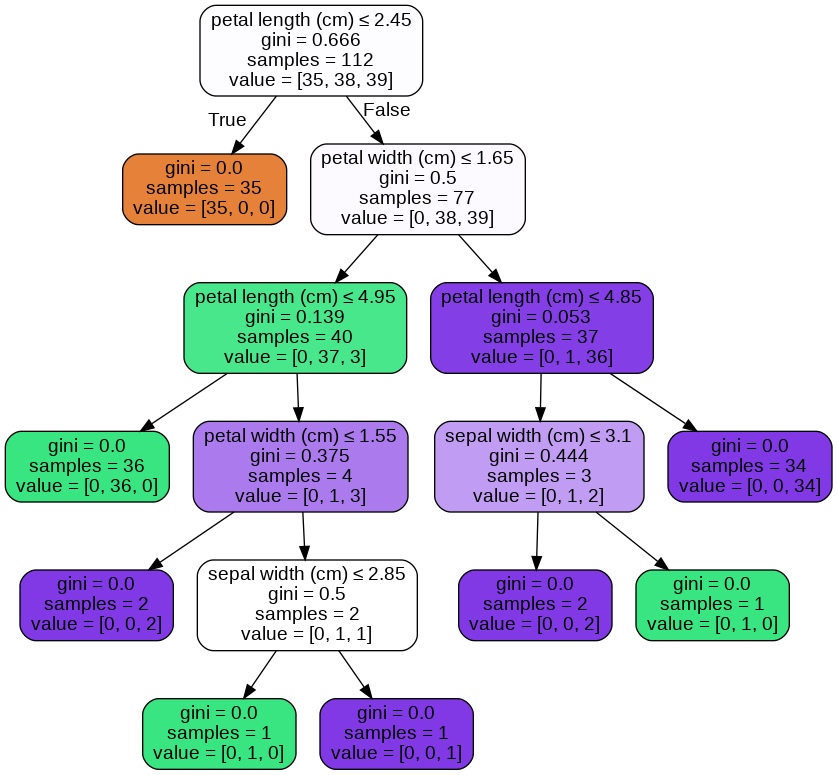

In [ ]:

clf = DecisionTreeClassifier(max_depth=6).fit(X_train,y_train)
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names=iris.feature_names,
               filled=True, rounded=True,
               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**Pre-pruned version (max_depth = 3)**

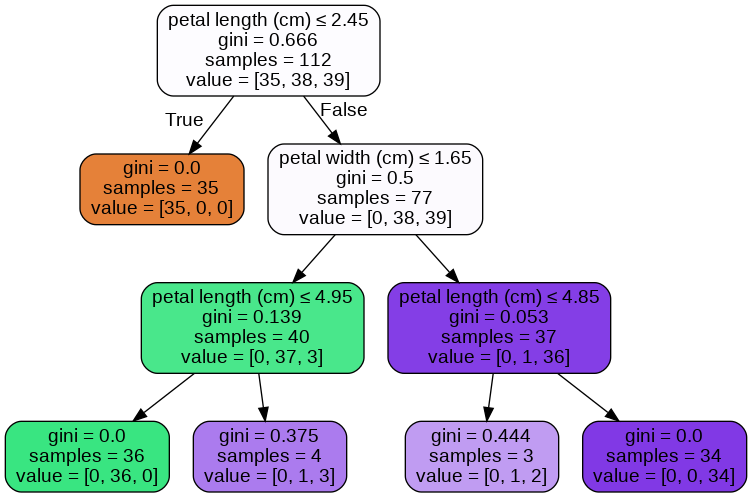

In [ ]:
clf = DecisionTreeClassifier(max_depth=3).fit(X_train,y_train)
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names=iris.feature_names,
               filled=True, rounded=True,
               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**Accuracy of model**

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3157894736842105


In [ ]:
print('\033[1m'+"Confusion Matrix") #'\033[1m' to bold the text
print ('\033[0m')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix

[[4 3 6]
 [6 6 4]
 [5 2 2]]


In [ ]:
print('\033[1m'+"Classification Report")
print ('\033[0m')
print(classification_report(y_test, y_pred))

Classification Report

              precision    recall  f1-score   support

           0       0.27      0.31      0.29        13
           1       0.55      0.38      0.44        16
           2       0.17      0.22      0.19         9

    accuracy                           0.32        38
   macro avg       0.33      0.30      0.31        38
weighted avg       0.36      0.32      0.33        38

